This jupyter notebook is used for data cleaning and analysis of the data of the public administration provided by Reply.
In this file you can find the following sections:

1. Data Cleaning and Preprocessing
2. Exploratory Data Analysis (EDA)
3. Some queries given to the agent, manually analyzed and compared with the results of the agent

## Data Cleaning and Preprocessing
In this section we will clean and preprocess the data to make it ready for the analysis. In particular, we transform datasets' names and columns headers. Then, we transform all the names in lowercase.
At the end, some little transofrmations, changing yes/no to 1/0, and creating age_group and income_brackets variables. 

In [ ]:
import pandas as pd
import os

#standardize paths
input_folder = "raw_datasets"
output_folder = "datasets"
os.makedirs(output_folder, exist_ok=True)

#map the input filenames to the desired output filenames
filename_mapping = {
    "EntryAccreditoStipendi_202501.csv": "salary.csv",
    "EntryAccessoAmministrati_202501.csv": "admin_access.csv",
    "EntryPendolarismo_202501.csv": "commuters.csv",
    "EntryAmministratiPerFasciaDiReddito_202501.csv": "income_brackets.csv"
}


In [ ]:
#Change of the language, name mapping for the columns
column_mappings = {
    "EntryAccreditoStipendi_202501.csv": {
        "comune_della_sede": "municipality",
        "amministrazione": "administration",
        "eta_min": "min_age",
        "eta_max": "max_age",
        "sesso": "gender",
        "modalita_pagamento": "payment_method",
        "numero": "salary_records"
    },
    "EntryAccessoAmministrati_202501.csv": {
        "regione_residenza_domicilio": "region_of_residence",
        "amministrazione_appartenenza": "administration",
        "sesso": "gender",
        "eta_max": "max_age",
        "eta_min": "min_age",
        "modalita_autenticazione": "authentication_method",
        "numero_occorrenze": "number_of_occurrences"
    },
    "EntryPendolarismo_202501.csv": {
        "provincia_della_sede": "province_of_the_location",
        "comune_della_sede": "municipality_of_the_location",
        "stesso_comune": 'lives_and_works_same_municipality',
        "ente": "administration",
        "numero_amministrati": "number_of_commuters",
        "distanza_min_KM": "commute_distance_min_km",
        "distanza_max_KM": "commute_distance_max_km"
    },
    "EntryAmministratiPerFasciaDiReddito_202501.csv": {
        "comparto": "sector",
        "regione_residenza": "region_of_residence",
        "sesso": "gender",
        "eta_min": "min_age",
        "eta_max": "max_age",
        "aliquota_max": "max_tax_rate",
        "fascia_reddito_min": "min_income_brackets",
        "fascia_reddito_max": "max_income_brackets",
        "numerosita": "population_size"
    }
}

# add the column age_group to the dataframe
def add_age_group(df):
    if "min_age" in df.columns and "max_age" in df.columns:
        df["age_group"] = df["min_age"].astype(str) + "-" + df["max_age"].astype(str)
        # Reordina le colonne con age_group subito dopo max_age
        cols = df.columns.tolist()
        idx = cols.index("max_age") + 1
        cols = cols[:idx] + ["age_group"] + [c for c in cols if c not in cols[:idx] + ["age_group"]]
        df = df[cols]
    return df

#loop through the files in the input folde
for original_file, new_file in filename_mapping.items():
    input_path = os.path.join(input_folder, original_file)
    if not os.path.exists(input_path):
        print(f"⚠️ File not found: {input_path} — Skipping.")
        continue

    df = pd.read_csv(input_path)
    #columns name mapping
    df.rename(columns=column_mappings[original_file], inplace=True)
    df.columns = [col.lower() for col in df.columns]  #convert to lowercase
    df = add_age_group(df)
    output_path = os.path.join(output_folder, new_file)
    df.to_csv(output_path, index=False)
    print(f"✅ Saved {new_file} to {output_folder}/")

✅ Saved salary.csv to datasets/
✅ Saved admin_access.csv to datasets/
✅ Saved commuters.csv to datasets/
✅ Saved income_brackets.csv to datasets/


In [3]:
commuters_df = pd.read_csv(os.path.join(output_folder, "commuters.csv"))
commuters = commuters_df

In [4]:
# Load datasets
salary = pd.read_csv("datasets/salary.csv")
admin_access = pd.read_csv("datasets/admin_access.csv")
commuters = pd.read_csv("datasets/commuters.csv")
income_brackets = pd.read_csv("datasets/income_brackets.csv")

In [5]:
# Transform all string values to lowercase
salary = salary.applymap(lambda x: x.lower() if isinstance(x, str) else x)
admin_access = admin_access.applymap(lambda x: x.lower() if isinstance(x, str) else x)
commuters = commuters.applymap(lambda x: x.lower() if isinstance(x, str) else x)
income_brackets = income_brackets.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Save the transformed datasets
salary.to_csv("datasets/salary.csv", index=False)
admin_access.to_csv("datasets/admin_access.csv", index=False)
commuters.to_csv("datasets/commuters.csv", index=False)
income_brackets.to_csv("datasets/income_brackets.csv", index=False)

/var/folders/b9/r20p41v577g1k8jfkq256tp80000gn/T/ipykernel_22426/1947945941.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  salary = salary.applymap(lambda x: x.lower() if isinstance(x, str) else x)
/var/folders/b9/r20p41v577g1k8jfkq256tp80000gn/T/ipykernel_22426/1947945941.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  admin_access = admin_access.applymap(lambda x: x.lower() if isinstance(x, str) else x)
/var/folders/b9/r20p41v577g1k8jfkq256tp80000gn/T/ipykernel_22426/1947945941.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  commuters = commuters.applymap(lambda x: x.lower() if isinstance(x, str) else x)
/var/folders/b9/r20p41v577g1k8jfkq256tp80000gn/T/ipykernel_22426/1947945941.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  income_brackets = income_brackets.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [ ]:
#Function to convert max_age to int64
def convert_max_age(df):
    df["max_age"] = pd.to_numeric(df["max_age"], errors="coerce").astype("Int64")
    return df
    
#Apply the function
salary = convert_max_age(salary)
income_brackets = convert_max_age(income_brackets)
admin_access = convert_max_age(admin_access)

In [ ]:
#Convert distance columns to numeric
commuters["distance_min_km"] = pd.to_numeric(commuters["distance_min_km"], errors="coerce").astype("Int64")
commuters["distance_max_km"] = pd.to_numeric(commuters["distance_max_km"], errors="coerce").astype("Int64")

#Rename columns to match the new naming convention
commuters.rename(columns={
    "distance_min_km": "commute_distance_min_km",
    "distance_max_km": "commute_distance_max_km"
}, inplace=True)

In [ ]:
#convert the "lives_and_works_same_municipality" column to binary values
commuters["lives_and_works_same_municipality"] = commuters["lives_and_works_same_municipality"].map({
    "si": 1,
    "no": 0
})
commuters.to_csv('datasets/commuters.csv', index=False)

In [9]:
# Get information about each dataset
print("Salary Dataset Info:")
print(salary.info())
print("\nAdmin Access Dataset Info:")
print(admin_access.info())
print("\nCommuters Dataset Info:")
print(commuters.info())
print("\nIncome Brackets Dataset Info:")
print(income_brackets.info())   

Salary Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25580 entries, 0 to 25579
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   municipality    25580 non-null  object
 1   administration  25580 non-null  object
 2   min_age         25580 non-null  int64 
 3   max_age         23355 non-null  Int64 
 4   age_group       25580 non-null  object
 5   gender          25580 non-null  object
 6   payment_method  25580 non-null  object
 7   salary_records  25580 non-null  int64 
dtypes: Int64(1), int64(2), object(5)
memory usage: 1.6+ MB
None

Admin Access Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8528 entries, 0 to 8527
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   region_of_residence    8528 non-null   object
 1   administration         8528 non-null   object
 2   gender                 

In [ ]:
income_df = pd.read_csv("datasets/income_brackets.csv")

income_df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# Remove leading and trailing spaces from all column names
def parse_bracket_value(value):
    if pd.isna(value):
        return (None, None)
    value = str(value).strip().lower()
    try:
        if "fino a" in value:
            return (None, int(value.replace("fino a", "").strip()))
        elif "oltre" in value:
            return (int(value.replace("oltre i", "").strip()), None)
        elif "-" in value:
            parts = value.replace(" ", "").split("-")
            return (int(parts[0]), int(parts[1]))
        else:
            val = int(value)
            return (val, val)
    except:
        return (None, None)

# Combine the min and max income brackets into a single range
def combine_brackets(row):
    min_val, _ = parse_bracket_value(row["min_income_brackets"])
    _, max_val = parse_bracket_value(row["max_income_brackets"])
    if pd.isna(min_val) and pd.isna(max_val):
        return "Invalid"
    elif max_val is None or pd.isna(max_val):
        return f"{min_val}+"
    elif min_val is None or pd.isna(min_val):
        return f"0–{max_val}"
    else:
        return f"{min_val}–{max_val}"

# Apply the parsing function to the income brackets
income_df["income_bracket_range"] = income_df.apply(combine_brackets, axis=1)


cols = income_df.columns.tolist()
if "income_bracket_range" in cols:
    cols.remove("income_bracket_range")
idx = cols.index("max_income_brackets") + 1
new_order = cols[:idx] + ["income_bracket_range"] + cols[idx:]
income_df = income_df[new_order]

#save file
income_df.to_csv("datasets/income_brackets.csv", index=False)

income_brackets = pd.read_csv("datasets/income_brackets.csv")
income_brackets.head()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   sector                5099 non-null   object
 1   region_of_residence   5099 non-null   object
 2   gender                5099 non-null   int64 
 3   min_age               5099 non-null   int64 
 4   max_age               5099 non-null   object
 5   age_group             5099 non-null   object
 6   max_tax_rate          5099 non-null   int64 
 7   min_income_brackets   3471 non-null   object
 8   max_income_brackets   3376 non-null   object
 9   income_bracket_range  5099 non-null   object
 10  population_size       5099 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 438.3+ KB


In [ ]:
file_path = 'datasets/salary.csv'
df = pd.read_csv(file_path)

# convert the gender column to binary values
df['gender'] = df['gender'].map({'m': 1, 'f': 0})

# save the new DataFrame to a CSV file 
df.to_csv('datasets/salary.csv', index=False)

In [ ]:
file_path = 'datasets/admin_access.csv'
df = pd.read_csv(file_path)

# convert the gender column to binary values
df['gender'] = df['gender'].map({'m': 1, 'f': 0})

# save the new DataFrame to a CSV file 
df.to_csv('datasets/admin_access.csv', index=False)

In [ ]:

file_path = 'datasets/income_brackets.csv'
df = pd.read_csv(file_path)

# convert the gender column to binary values
df['gender'] = df['gender'].map({'m': 1, 'f': 0})   

# save the new DataFrame to a CSV file
df.to_csv('datasets/income_brackets.csv', index=False)

In [ ]:
df_admin = pd.read_csv("datasets/admin_access.csv")

# convert the max_age column to numeric
df_admin["max_age"] = pd.to_numeric(df_admin["max_age"], errors="coerce").astype("Int64")

# convert the min_age column to numeric
df_admin.to_csv("datasets/admin_access.csv", index=False)

In [51]:
#convert from float to int
admin_access = pd.read_csv("datasets/admin_access.csv")
admin_access["max_age"] = admin_access["max_age"].astype("Int64")
admin_access= df_admin

admin_access.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8528 entries, 0 to 8527
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   region_of_residence    8528 non-null   object
 1   administration         8528 non-null   object
 2   gender                 8528 non-null   int64 
 3   max_age                7528 non-null   Int64 
 4   age_group              8528 non-null   object
 5   min_age                8528 non-null   int64 
 6   authentication_method  8528 non-null   object
 7   number_of_occurrences  8528 non-null   int64 
dtypes: Int64(1), int64(3), object(4)
memory usage: 541.5+ KB


## Exploratory Data Analysis
In this notebook are showed some insights, patterns and distribution of the four datasets provided by NoiPa portal. The key idea is to show how data are distributed, plots or analysis that are useful to test if agents's answers are right or wrong. 



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

datasets_info = {
    "Admin Access": "admin_access.csv",
    "Salary": "salary.csv",
    "Income Brackets": "income_brackets.csv",
    "Commuters": "commuters.csv"
}

datasets = {}

# 1. Overview datasets
for name, filename in datasets_info.items():
    file_path = os.path.join("datasets", filename)
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        datasets[name] = df

        print(f"\n—— {name} ——")
        print(f"Shape: {df.shape}")
        print(f"Columns: {df.columns.tolist()}")
        print(f"Types:\n{df.dtypes}")
        print(f"First 5 rows:\n{df.head(3)}")
    else:
        print(f"File not found: {file_path}")

# 2. Missing values
for name, df in datasets.items():
    print(f"\n—— MISSING DATA: {name} ——")
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    missing_df = pd.DataFrame({
        "MissingCount": missing,
        "MissingPercent": missing_pct
    })
    missing_df = missing_df[missing_df["MissingCount"] > 0]
    print(missing_df)



—— Admin Access ——
Shape: (8528, 8)
Columns: ['region_of_residence', 'administration', 'gender', 'max_age', 'age_group', 'min_age', 'authentication_method', 'number_of_occurrences']
Types:
region_of_residence      object
administration           object
gender                    int64
max_age                  object
age_group                object
min_age                   int64
authentication_method    object
number_of_occurrences     int64
dtype: object
First 5 rows:
  region_of_residence               administration  gender max_age age_group  \
0             abruzzo  a.o. s. giovanni addolorata       0      34     25-34   
1             abruzzo  a.o. s. giovanni addolorata       1      34     25-34   
2             abruzzo  a.o.r.n. antonio cardarelli       1      44     35-44   

   min_age authentication_method  number_of_occurrences  
0       25                  spid                      2  
1       25                  spid                      3  
2       35                  spi

In [15]:
#Descriptive statistics
for name, df in datasets.items():
    print(f"\n--- DESCRIPTIVE STATISTICS: {name} ---")
    numeriche = df.select_dtypes(include=[np.number])
    categoriche = df.select_dtypes(exclude=[np.number])

    print("Numeric:")
    print(numeriche.describe())

    print("\nCategorical:")
    for col in categoriche.columns:
        print(f"\n{col} - {df[col].nunique()} categories")  
        print(df[col].value_counts().head())


--- DESCRIPTIVE STATISTICS: Admin Access ---
Numeric:
            gender      min_age  number_of_occurrences
count  8528.000000  8528.000000            8528.000000
mean      0.536820    42.994137             177.795145
std       0.498672    13.882474            1124.427105
min       0.000000    18.000000               2.000000
25%       0.000000    35.000000               3.000000
50%       1.000000    45.000000               9.000000
75%       1.000000    55.000000              42.000000
max       1.000000    65.000000           29526.000000

Categorical:

region_of_residence - 21 categories
region_of_residence
lazio       1256
campania     676
puglia       538
sicilia      530
toscana      481
Name: count, dtype: int64

administration - 81 categories
administration
ministero della difesa                    1015
ministero dell'interno                     912
ministero dell'istruzione e del merito     770
ministero della giustizia                  573
agenzia delle entrate            

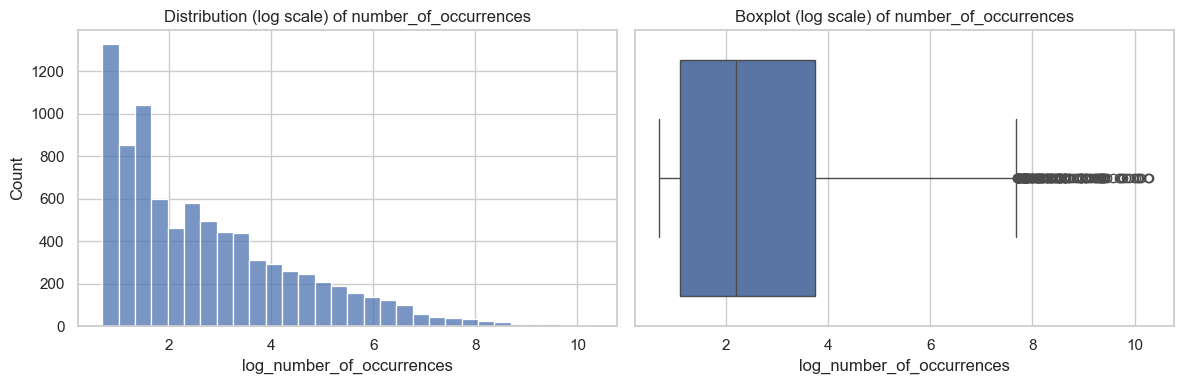

In [16]:
#LOG-DISTRIBUTION SALARY_RECORDS
df_admin = pd.read_csv("datasets/admin_access.csv")
df_admin_log = df_admin[df_admin["number_of_occurrences"] > 0].copy()
df_admin_log["log_number_of_occurrences"] = np.log(df_admin_log["number_of_occurrences"])

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df_admin_log["log_number_of_occurrences"], bins=30, kde=False, ax=axes[0])
axes[0].set_title("Distribution (log scale) of number_of_occurrences")
sns.boxplot(x=df_admin_log["log_number_of_occurrences"], ax=axes[1])
axes[1].set_title("Boxplot (log scale) of number_of_occurrences")
plt.tight_layout()
plt.show()




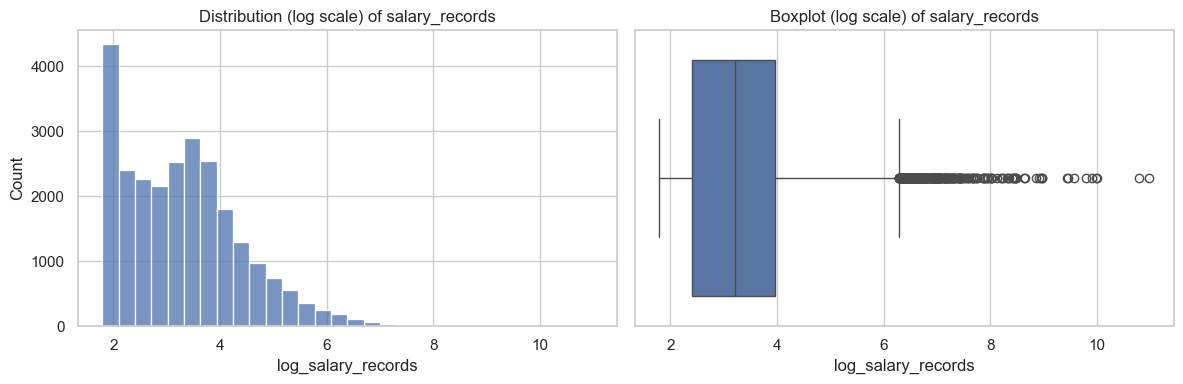

In [17]:
#LOG-DISTRIBUTION SALARY_RECORDS
df_salary = pd.read_csv("datasets/salary.csv")
df_salary_log = df_salary[df_salary["salary_records"] > 0].copy()
df_salary_log["log_salary_records"] = np.log(df_salary_log["salary_records"])

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df_salary_log["log_salary_records"], bins=30, kde=False, ax=axes[0])
axes[0].set_title("Distribution (log scale) of salary_records")
sns.boxplot(x=df_salary_log["log_salary_records"], ax=axes[1])
axes[1].set_title("Boxplot (log scale) of salary_records")
plt.tight_layout()
plt.show()



Text(0.5, 1.0, 'Boxplot (log scale) of population_size')

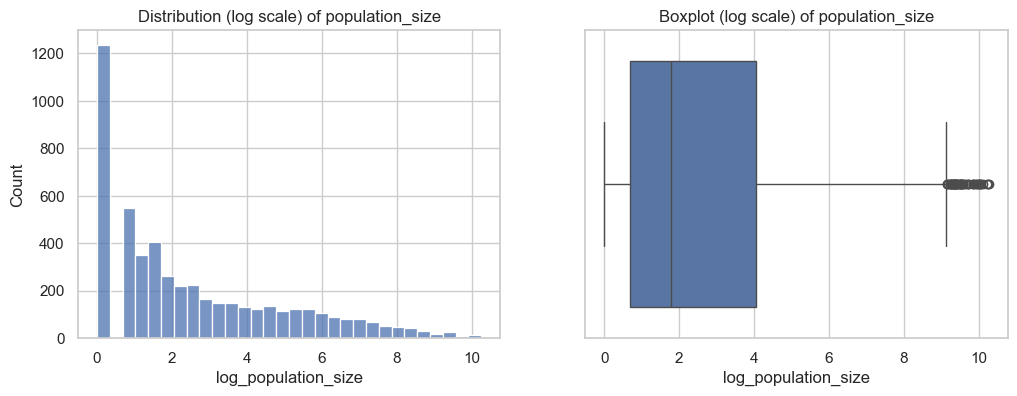

In [18]:
#LOG-DISTRIBUTION POPULATION_SIZE
df_income = pd.read_csv("datasets/income_brackets.csv")
df_income_log = df_income[df_income["population_size"] > 0].copy()
df_income_log["log_population_size"] = np.log(df_income_log["population_size"])

#plots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df_income_log["log_population_size"], bins=30, kde=False, ax=axes[0])
axes[0].set_title("Distribution (log scale) of population_size")
sns.boxplot(x=df_income_log["log_population_size"], ax=axes[1])
axes[1].set_title("Boxplot (log scale) of population_size")



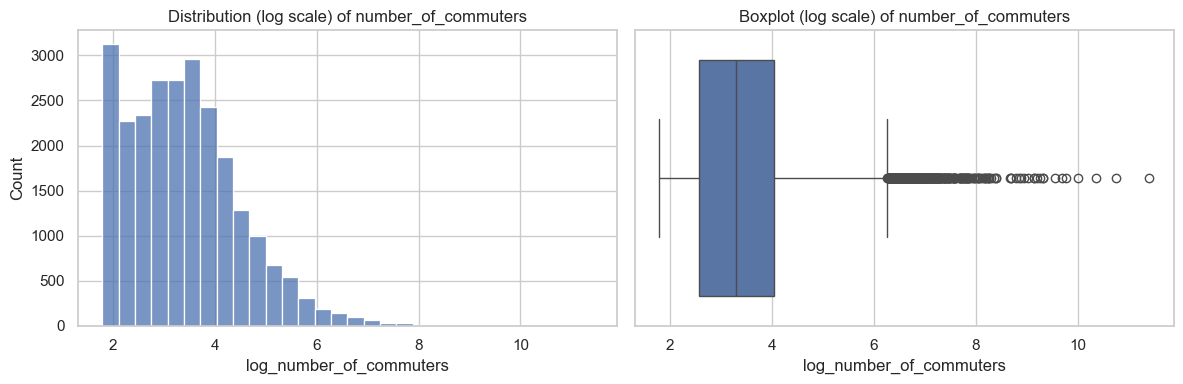

In [19]:
#LOG-DISTRIBUTION NUMBER_OF_COMMUTERS
df_commuters = pd.read_csv("datasets/commuters.csv")
df_commuters = df_commuters[df_commuters["number_of_commuters"] > 0]
df_commuters["log_number_of_commuters"] = np.log(df_commuters["number_of_commuters"])

# Plot su scala logaritmica
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df_commuters["log_number_of_commuters"], bins=30, kde=False, ax=axes[0])
axes[0].set_title("Distribution (log scale) of number_of_commuters")

sns.boxplot(x=df_commuters["log_number_of_commuters"], ax=axes[1])
axes[1].set_title("Boxplot (log scale) of number_of_commuters")

plt.tight_layout()
plt.show()



--- OUTLIER DETECTION: Admin Access ---
gender: 0 outlier (0.00%)
min_age: 0 outlier (0.00%)
number_of_occurrences: 1360 outlier (15.95%)


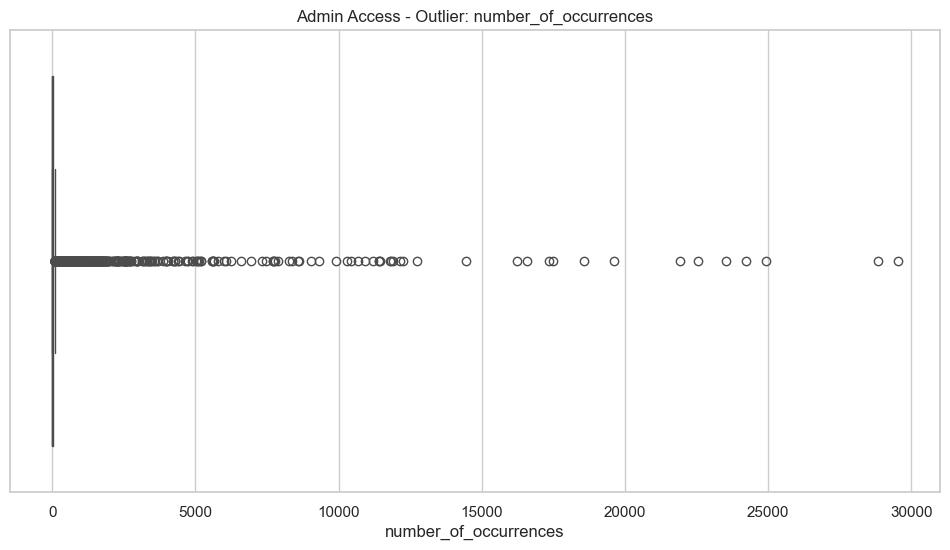


--- OUTLIER DETECTION: Salary ---
min_age: 0 outlier (0.00%)
gender: 0 outlier (0.00%)
salary_records: 2710 outlier (10.59%)


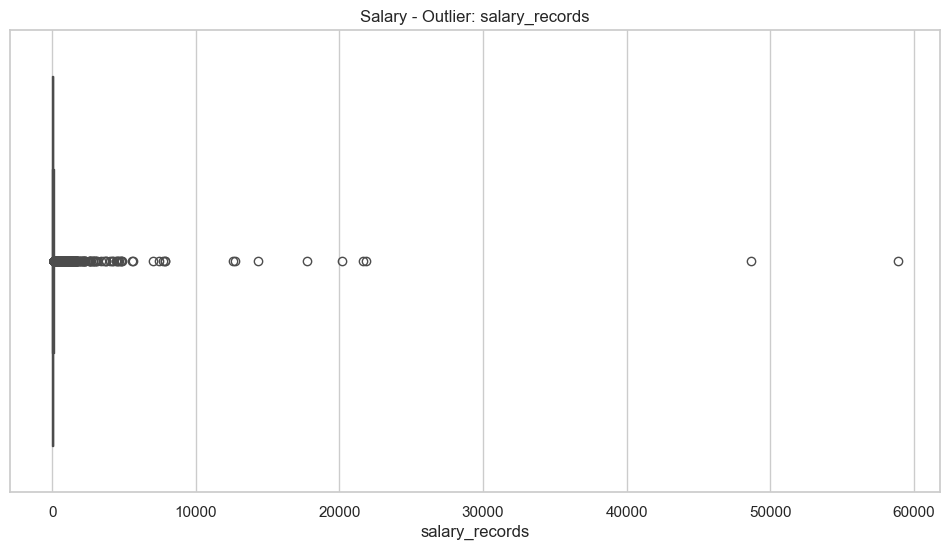


--- OUTLIER DETECTION: Income Brackets ---
gender: 0 outlier (0.00%)
min_age: 0 outlier (0.00%)
max_tax_rate: 0 outlier (0.00%)
population_size: 955 outlier (18.73%)


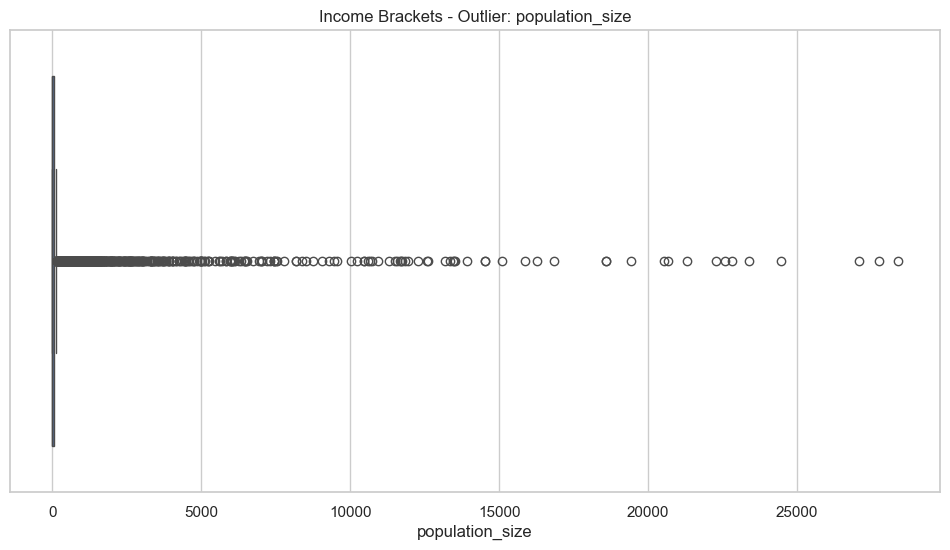


--- OUTLIER DETECTION: Commuters ---
lives_and_works_same_municipality: 5876 outlier (23.65%)


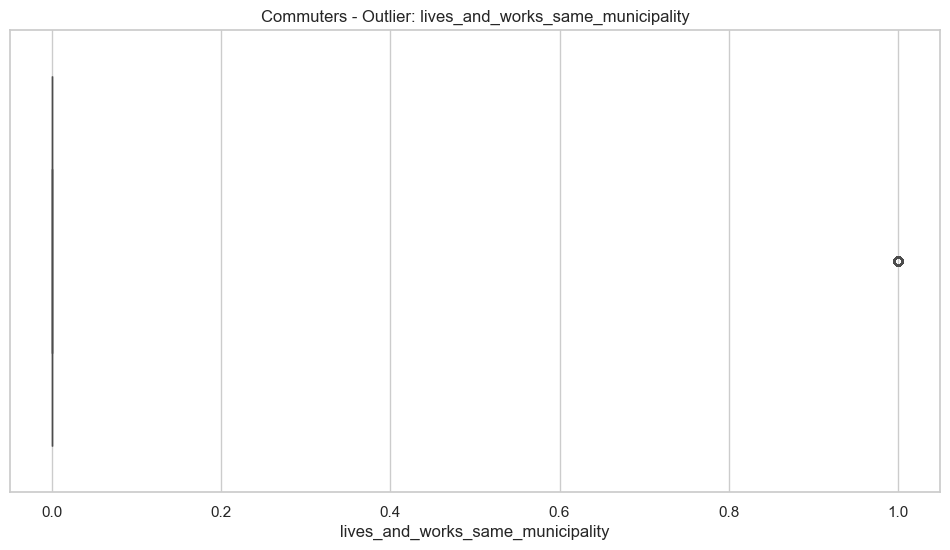

number_of_commuters: 2645 outlier (10.65%)


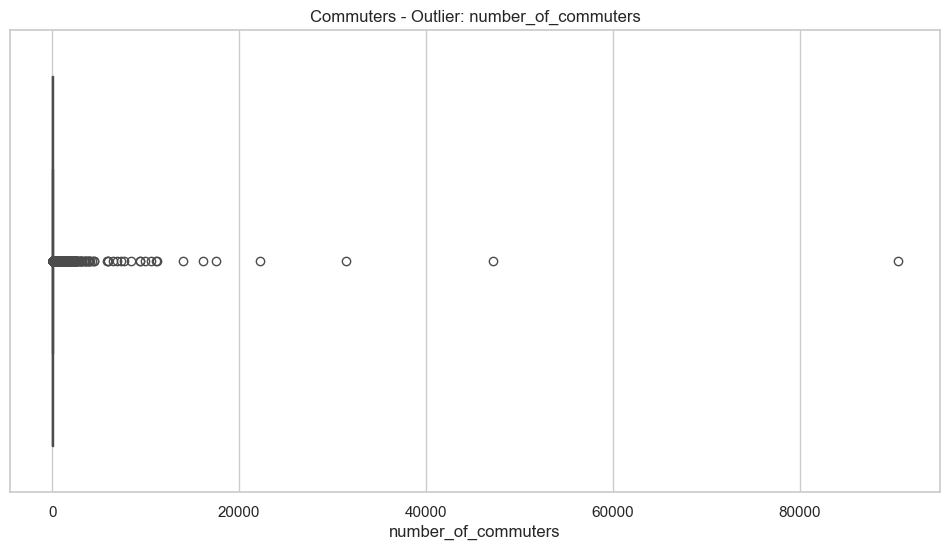

commute_distance_min_km: 3335 outlier (13.42%)


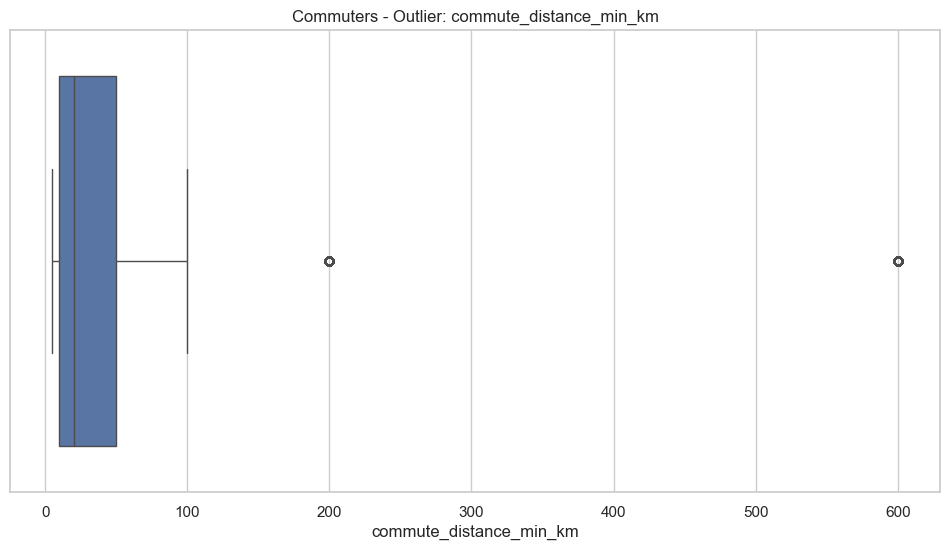

commute_distance_max_km: 2264 outlier (9.11%)


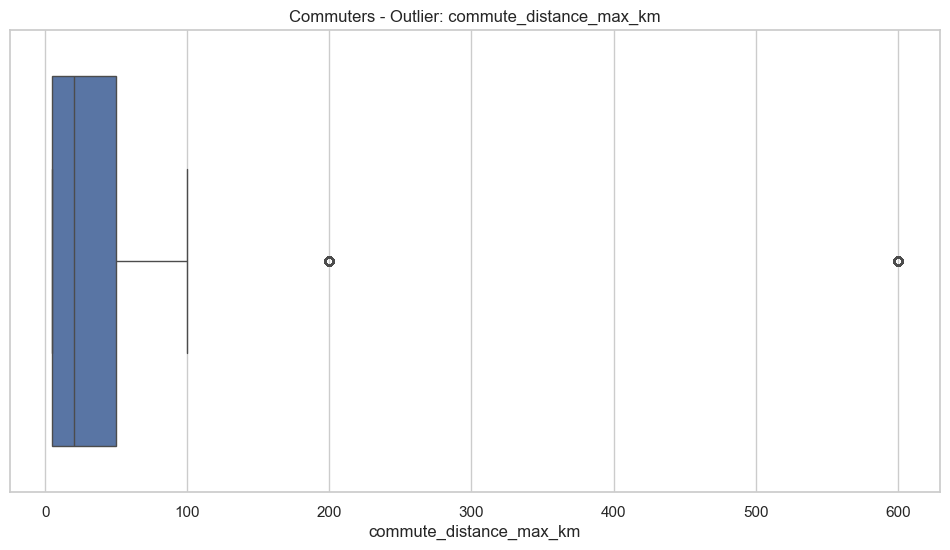

In [20]:
# Outlier detection
for name, df in datasets.items():
    print(f"\n--- OUTLIER DETECTION: {name} ---")
    numeriche = df.select_dtypes(include=[np.number])
    for col in numeriche.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
        outlier_pct = (len(outliers) / len(df)) * 100
        print(f"{col}: {len(outliers)} outlier ({outlier_pct:.2f}%)")
        if len(outliers) > 0:
            plt.figure()
            sns.boxplot(x=df[col])
            plt.title(f"{name} - Outlier: {col}")
            plt.show()

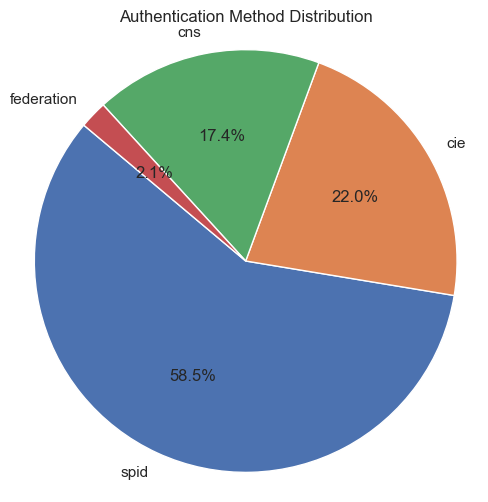

In [21]:
#pie chart authentication method
df_admin = pd.read_csv("datasets/admin_access.csv")

auth_counts = df_admin["authentication_method"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(auth_counts, labels=auth_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Authentication Method Distribution")
plt.axis('equal')
plt.show()


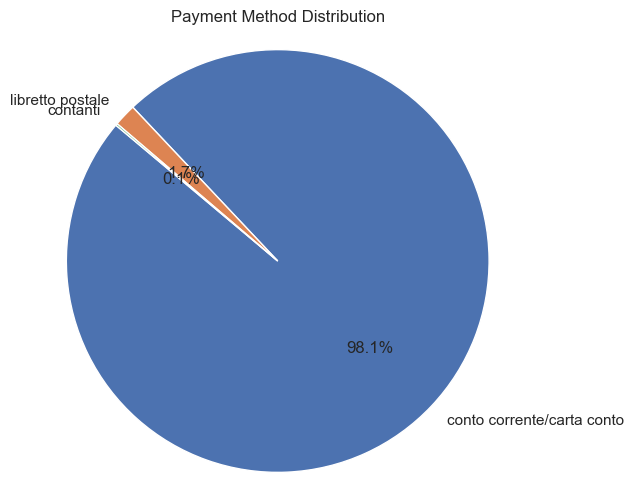

In [22]:
#pie chart payment method
df_salary = pd.read_csv("datasets/salary.csv")

payment_counts = df_salary["payment_method"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Payment Method Distribution")
plt.axis('equal')
plt.show()


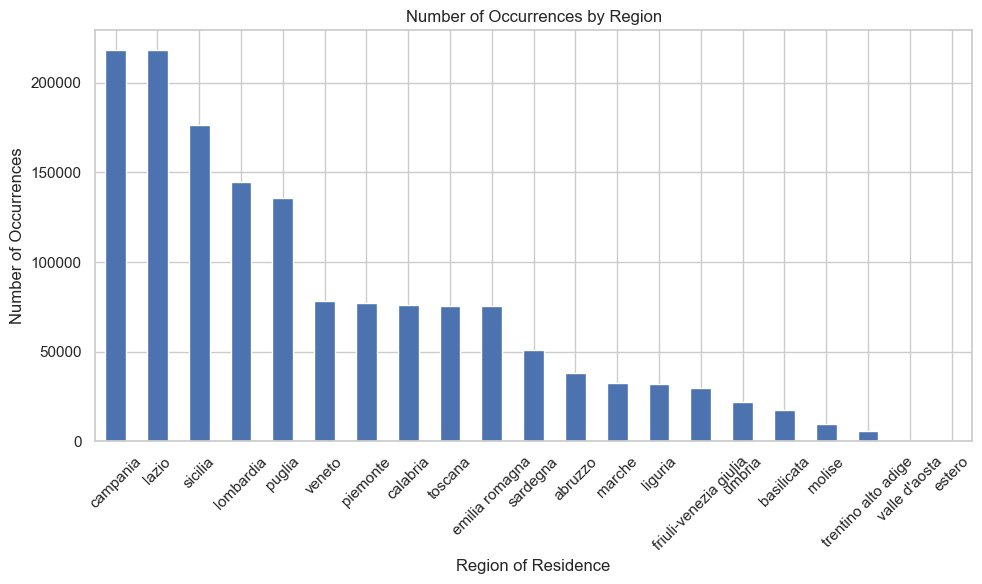

In [23]:
#distribution of number of occurrences by region
region_group = df_admin.groupby("region_of_residence")["number_of_occurrences"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
region_group.plot(kind='bar')
plt.title("Number of Occurrences by Region")
plt.xlabel("Region of Residence")
plt.ylabel("Number of Occurrences")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#How many commuters live and work in the same municipality?

commuters = pd.read_csv("datasets/commuters.csv")
same_municipality_count = commuters[commuters["lives_and_works_same_municipality"] == 1]["number_of_commuters"].count()

print(f"Total commuters who live and work in the same municipality: {same_municipality_count}")


#How many unique payment_method values exist in the dataset?
salary = pd.read_csv("datasets/salary.csv")
unique_methods = salary["payment_method"].nunique()
method_list = salary["payment_method"].unique()

print(f"Unique payment_method values: {unique_methods}")
print("Payment methods:", method_list)

# What is the most common authentication_method?
admin = pd.read_csv("datasets/admin_access.csv")
most_common_method = admin["authentication_method"].value_counts().idxmax()
count = admin["authentication_method"].value_counts().max()

print(f"The most common authentication method is '{most_common_method}' with {count} occurrences.")



Total commuters who live and work in the same municipality: 5876
Unique payment_method values: 3
Payment methods: ['conto corrente/carta conto' 'libretto postale' 'contanti']
The most common authentication method is 'spid' with 4989 occurrences.


  age_group  salary_records
0     18-24       83.376874
1     25-34       46.742354
2     35-44       64.961788
3     45-54       92.220150
4     55-64       88.029936
5      65-        24.360000


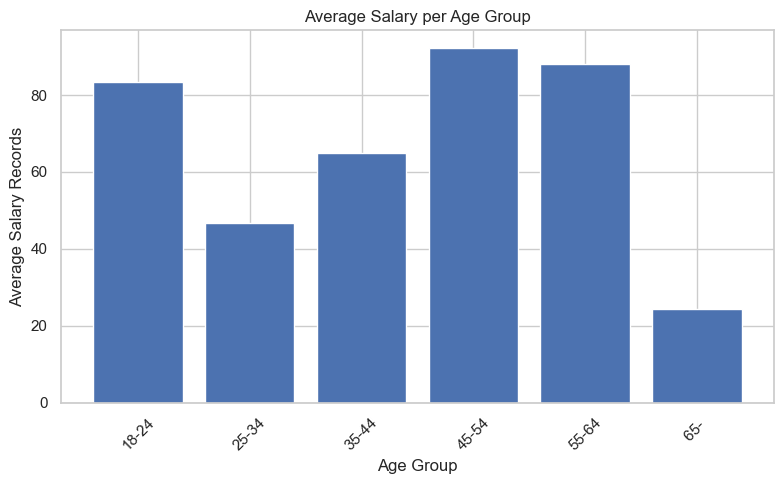

In [25]:
salary_df = pd.read_csv("datasets/salary.csv")
avg_salary_by_age_group = salary_df.groupby("age_group")["salary_records"].mean().reset_index()

print(avg_salary_by_age_group)

# Plotting the average salary per age group
plt.figure(figsize=(8,5))
plt.bar(avg_salary_by_age_group["age_group"], avg_salary_by_age_group["salary_records"])
plt.xlabel("Age Group")
plt.ylabel("Average Salary Records")
plt.title("Average Salary per Age Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

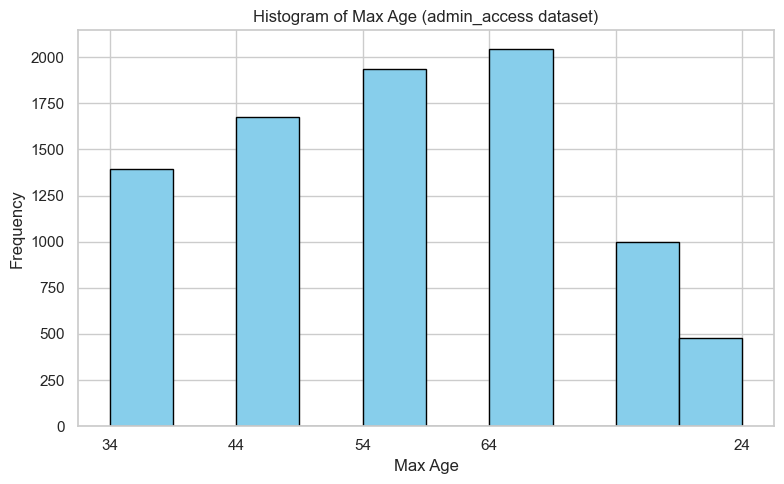

In [26]:
admin_df = pd.read_csv("datasets/admin_access.csv")

plt.figure(figsize=(8, 5))
plt.hist(admin_df["max_age"].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.title("Histogram of Max Age (admin_access dataset)")
plt.xlabel("Max Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
#What is the average commute distance for people who do not live and work in the same municipality?
commuters = pd.read_csv("datasets/commuters.csv")

commuters["commute_distance_min_km"] = pd.to_numeric(commuters["commute_distance_min_km"], errors="coerce")
commuters["commute_distance_max_km"] = pd.to_numeric(commuters["commute_distance_max_km"], errors="coerce")

commuters["commute_avg_km"] = commuters[["commute_distance_min_km", "commute_distance_max_km"]].mean(axis=1)

#filter commuters that do not live and work in the same municipality
filtered = commuters[commuters["lives_and_works_same_municipality"] == 0]

#calculate average distance
average_distance = filtered["commute_avg_km"].mean()

print(f"Average commute distance for people who do NOT live and work in the same municipality: {average_distance:.2f} km")

Average commute distance for people who do NOT live and work in the same municipality: 120.16 km


In [28]:
commuters = pd.read_csv("datasets/commuters.csv")

#convert distance in km
distance_threshold_km = 32.19  # 20 miles

#convert distance in km
commuters["commute_distance_min_km"] = pd.to_numeric(commuters["commute_distance_min_km"], errors="coerce")

#calculate total commuters per administration
total_commuters = commuters.groupby("administration")["number_of_commuters"].sum().rename("total_commuters")

#calculate commuters that do at least 20 miles (on the minimum distance)
long_commuters = commuters[commuters["commute_distance_min_km"] >= distance_threshold_km]
long_commuters_count = long_commuters.groupby("administration")["number_of_commuters"].sum().rename("over_20_miles")

#merge total commuters and long commuters   
merged = pd.merge(total_commuters, long_commuters_count, on="administration", how="left").fillna(0)

#calculate percentage
merged["percent_over_20_miles"] = (merged["over_20_miles"] / merged["total_commuters"]) * 100

#sort by percentage
result = merged.sort_values(by="percent_over_20_miles", ascending=False)

#print the top 10
print(result[["percent_over_20_miles"]].head(10))


                                                    percent_over_20_miles
administration                                                           
guardia di finanza                                              88.907803
ministero della difesa                                          88.116531
anvur(agenzia naz.valutazione sist.universitari...              84.609186
autorita' di bacino distr. dell'appennino sette...              66.666667
consiglio di stato e t.a.r.                                     63.118953
ansfisa - agenzia nazionale per la sicurezza de...              59.409594
ministero universita' e ricerca                                 53.863314
ente parco nazionale del gran sasso e monti del...              48.275862
ente strumentale alla croce rossa italiana                      46.153846
agenzia nazionale per i giovani - ang                           40.000000



# Questions from the excel workbook used to test the agents

In [29]:
# HERE ARE SOME QUESTIONS USED TO TEST 

# Load datasets
salary        = pd.read_csv('datasets/salary.csv')
income        = pd.read_csv('datasets/income_brackets.csv')
commuters     = pd.read_csv('datasets/commuters.csv')
access        = pd.read_csv('datasets/admin_access.csv')
# (if you have an "admin" dataset separate from access, load it here too)



In [30]:
# 1. Count how many people live and work in the same municipality.
count_same = (commuters['lives_and_works_same_municipality'] == 1).sum()

print(f"People live and work in the same municipality.: {count_same}")

# 2. How many employees are listed in the salary dataset?
print("Employees in salary dataset:", salary.shape[0])

# 3. List all the distinct age groups.
print("Distinct age groups (all datasets):")
for df, name in [(salary,'salary'), (income,'income'), (commuters,'commuters'), (access,'access')]:
    if 'age_group' in df.columns:
        print(f"  {name}: {df['age_group'].unique()}")

# 4. List all municipalities in the commuters dataset.
print("Municipalities in commuters dataset:", commuters['municipality_of_the_location'].unique())

People live and work in the same municipality.: 5876
Employees in salary dataset: 25580
Distinct age groups (all datasets):
  salary: ['25-34' '35-44' '45-54' '55-64' '65- ' '18-24']
  income: ['65- ' '25-34' '35-44' '45-54' '55-64' '18-24']
  access: ['25-34' '35-44' '45-54' '55-64' '65- ' '18-24']
Municipalities in commuters dataset: ['acireale' 'acquapendente' 'afragola' ... 'sambuca di sicilia' 'brennero'
 'villarosa']


In [31]:
# 5. Unique authentication methods in the access dataset
print("Auth methods in access dataset:", access['authentication_method'].unique())

# 6. Distinct age groups in the salary dataset
print("Salary age groups:", salary['age_group'].unique())

# 7. How many records for each gender in the income brackets dataset
print("Records by gender in income dataset:")
print(income['gender'].value_counts())

# 8. List the first five rows of each dataset
print("\n--- First 5 of salary ---\n", salary.head())
print("\n--- First 5 of income ---\n", income.head())
print("\n--- First 5 of commuters ---\n", commuters.head())
print("\n--- First 5 of access ---\n", access.head())

Auth methods in access dataset: ['spid' 'cie' 'cns' 'federation']
Salary age groups: ['25-34' '35-44' '45-54' '55-64' '65- ' '18-24']
Records by gender in income dataset:
gender
1    2650
0    2449
Name: count, dtype: int64

--- First 5 of salary ---
   municipality                          administration  min_age max_age  \
0  abano terme  ministero dell'istruzione e del merito       25      34   
1  abano terme  ministero dell'istruzione e del merito       25      34   
2  abano terme  ministero dell'istruzione e del merito       35      44   
3  abano terme  ministero dell'istruzione e del merito       35      44   
4  abano terme  ministero dell'istruzione e del merito       45      54   

  age_group  gender              payment_method  salary_records  
0     25-34       0  conto corrente/carta conto              31  
1     25-34       1  conto corrente/carta conto              18  
2     35-44       0  conto corrente/carta conto              56  
3     35-44       1  conto corren

In [32]:
# 9. Min and max commute distance in commuters dataset
print("Commute distance min/max:", commuters['commute_distance_min_km'].min(), commuters['commute_distance_min_km'].max())

# 10. How many occurrences per region in access dataset?
print("Occurrences by region in access dataset:")
print(access['region_of_residence'].value_counts())

# 11. List all sectors present in the income brackets data.
print("Sectors in income dataset:", income['sector'].unique())

# 12. List the column names of the salary dataset
print("Salary columns:", salary.columns.tolist())

Commute distance min/max: 5.0 600.0
Occurrences by region in access dataset:
region_of_residence
lazio                    1256
campania                  676
puglia                    538
sicilia                   530
toscana                   481
lombardia                 456
calabria                  438
emilia romagna            428
abruzzo                   424
veneto                    405
piemonte                  396
sardegna                  366
umbria                    344
liguria                   340
marche                    340
friuli-venezia giulia     304
basilicata                264
molise                    229
trentino alto adige       189
valle d'aosta              88
estero                     36
Name: count, dtype: int64
Sectors in income dataset: ['altro personale' 'area dirigenziale funzioni locali'
 'area dirigenziale funzioni centrali'
 'area dirigenziale istruzione e ricerca'
 'area dirigenziale presidenza del consiglio dei ministri'
 "area dirigenziale sanit

In [33]:
# 13. How many entries have missing values in any column of the commuters dataset
n_missing = commuters.isnull().any(axis=1).sum()
print("Commuters entries with any missing:", n_missing)

# 14. Retrieve the payment methods used in the salary dataset.
print("Payment methods in salary dataset:", salary['payment_method'].unique())

# 15. Count the number of administrations in the access dataset.
print("Unique administrations in access dataset:", access['administration'].nunique())

# 16. Find the top 5 municipalities with the highest number_of_commuters.
top5 = commuters.groupby('municipality_of_the_location')['number_of_commuters'] \
                .sum().nlargest(5)
print("Top 5 municipalities by commuters:\n", top5)

Commuters entries with any missing: 8197
Payment methods in salary dataset: ['conto corrente/carta conto' 'libretto postale' 'contanti']
Unique administrations in access dataset: 81
Top 5 municipalities by commuters:
 municipality_of_the_location
roma       436298
napoli      45964
milano      42132
torino      29762
palermo     28647
Name: number_of_commuters, dtype: int64


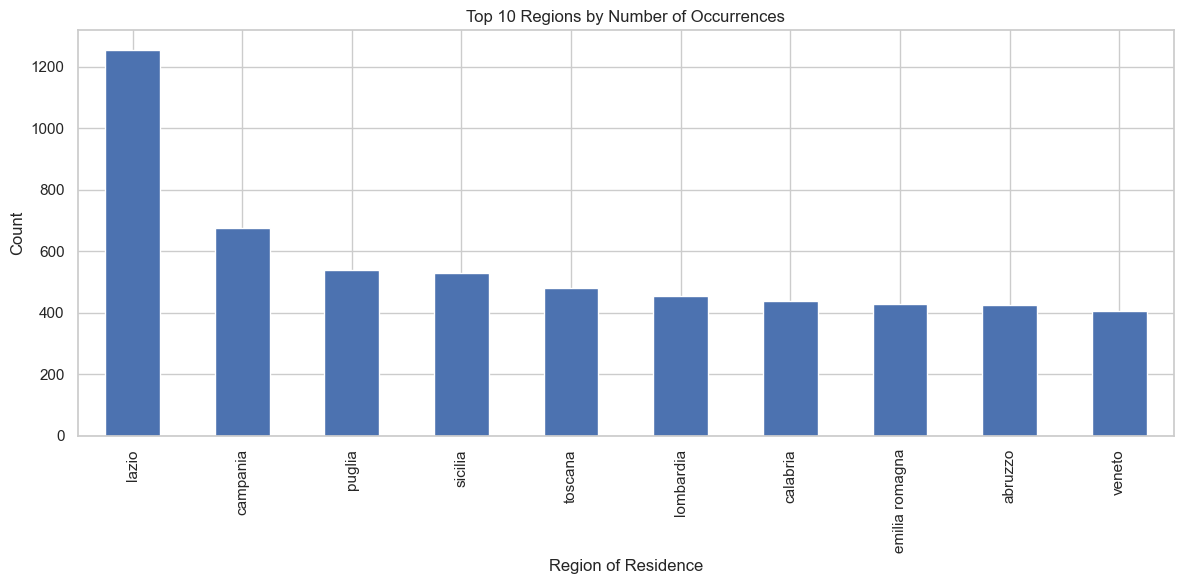

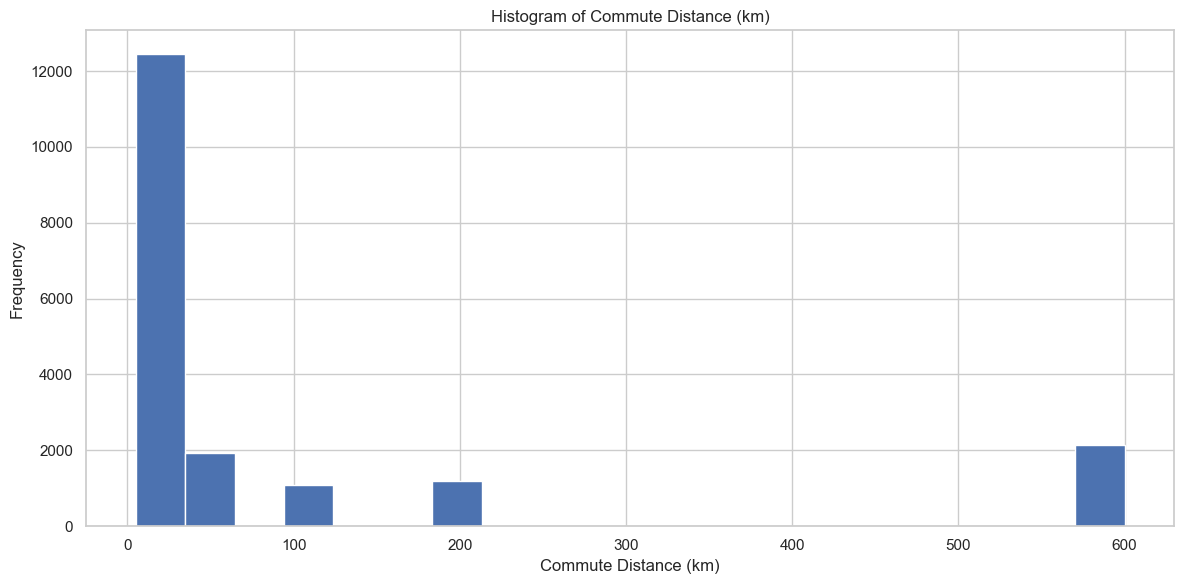

In [34]:
#VISUALIZATIONS

# 1. Barchart of the top 10 regions by number of occurrences
# using 'region_of_residence'
region_col = 'region_of_residence'
region_counts = access[region_col].value_counts().nlargest(10)
plt.figure()
region_counts.plot(kind='bar')
plt.title('Top 10 Regions by Number of Occurrences')
plt.xlabel('Region of Residence')
plt.ylabel('Count')
plt.tight_layout()

# 2. Histogram of commute_distance_min_km for all commuters
plt.figure()
commuters['commute_distance_min_km'].plot(kind='hist', bins=20)
plt.title('Histogram of Commute Distance (km)')
plt.xlabel('Commute Distance (km)')
plt.ylabel('Frequency')
plt.tight_layout()



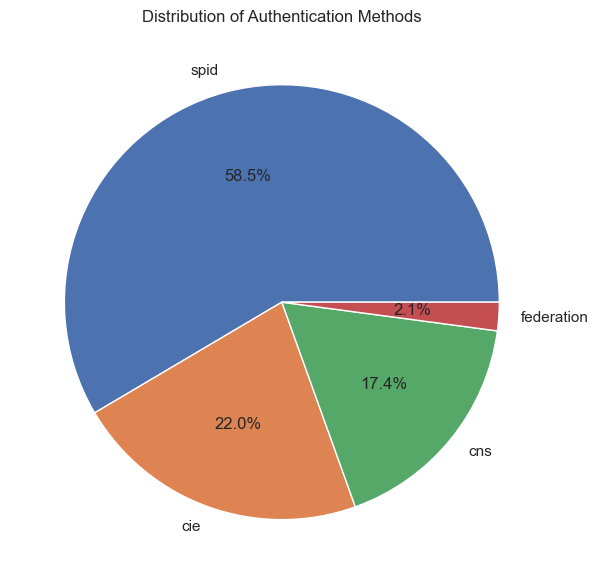

<Figure size 1200x600 with 0 Axes>

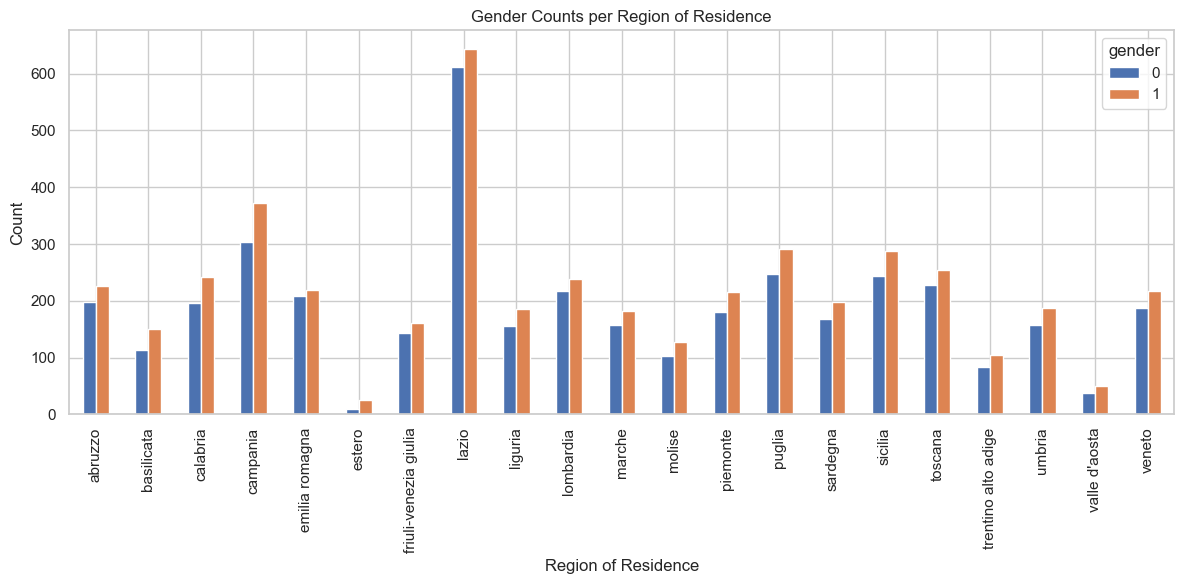

In [35]:
# 3. Pie chart of the distribution of authentication_method
plt.figure()
access['authentication_method'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Authentication Methods')
plt.ylabel('')
plt.tight_layout()

# 4. Stacked bar chart of gender counts per region_of_residence
plt.figure()
access.groupby([region_col, 'gender']).size().unstack(fill_value=0).plot(kind='bar')
plt.title('Gender Counts per Region of Residence')
plt.xlabel('Region of Residence')
plt.ylabel('Count')
plt.tight_layout()

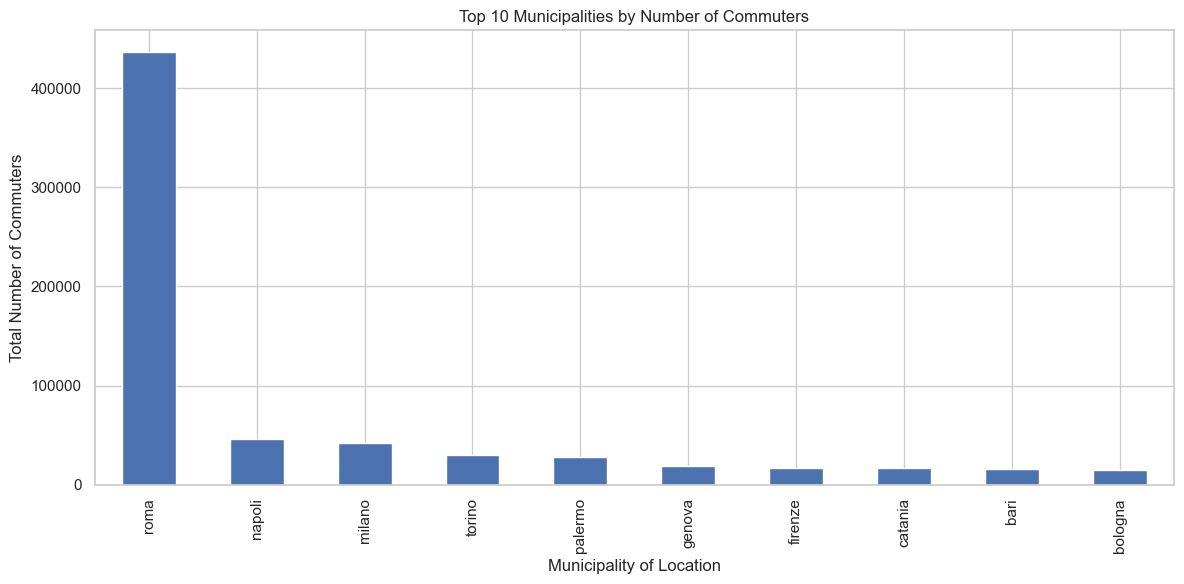

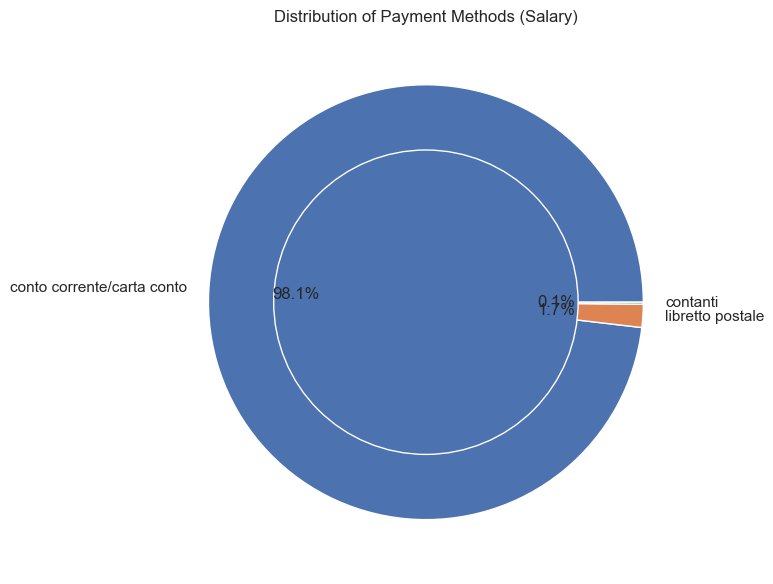

In [36]:
# 5. Bar chart of the top 10 municipality_of_location by sum of number_of_commuters
loc_col = 'municipality_of_the_location'
plt.figure()
commuters.groupby(loc_col)['number_of_commuters'].sum().nlargest(10).plot(kind='bar')
plt.title('Top 10 Municipalities by Number of Commuters')
plt.xlabel('Municipality of Location')
plt.ylabel('Total Number of Commuters')
plt.tight_layout()

# 6. Donut chart of distribution of payment_method in salary data
plt.figure()
counts = salary['payment_method'].value_counts()
wedges, texts, autotexts = plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
centre = plt.Circle((0,0), 0.70)
plt.gca().add_artist(centre)
plt.title('Distribution of Payment Methods (Salary)')
plt.ylabel('')
plt.tight_layout()

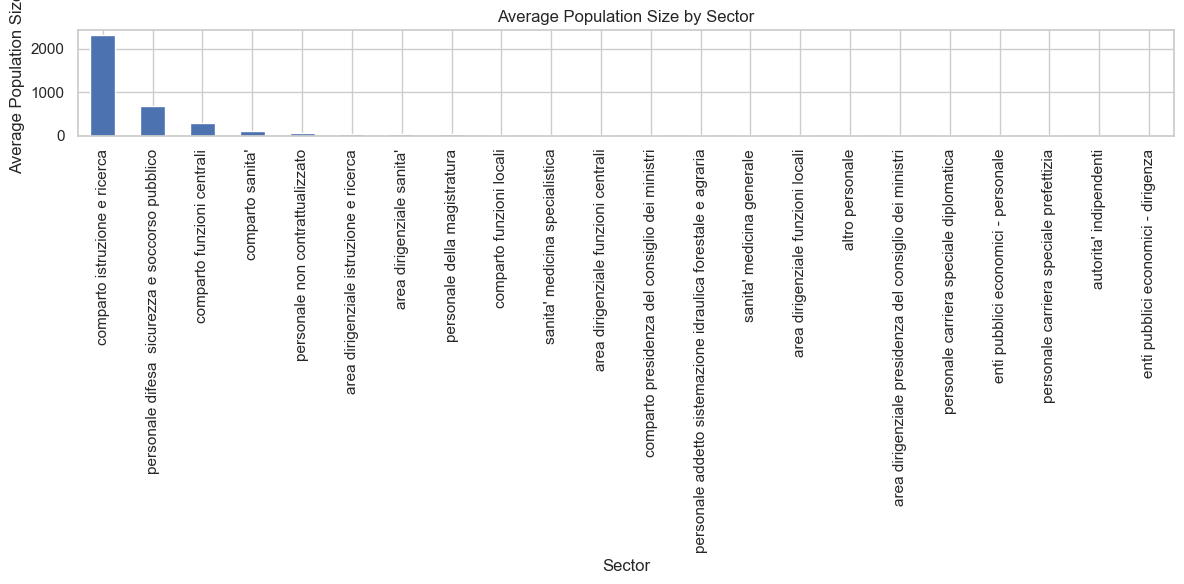

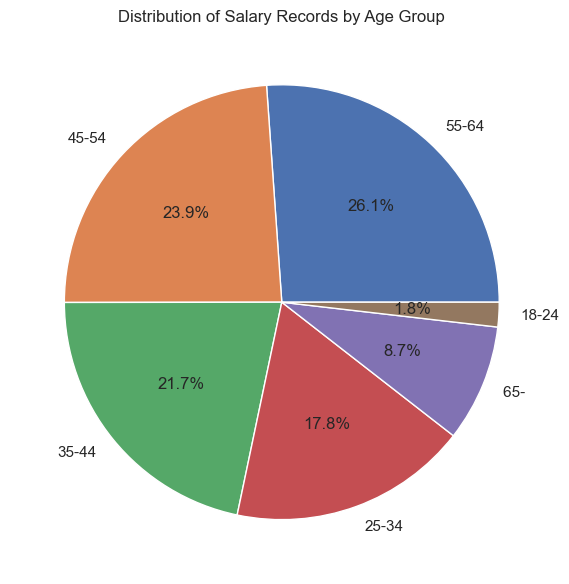

In [37]:
# 7. Bar chart of average population_size by sector in income_brackets, sorted descending
plt.figure()
income.groupby('sector')['population_size'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average Population Size by Sector')
plt.xlabel('Sector')
plt.ylabel('Average Population Size')
plt.tight_layout()

# 8. Pie chart of number_of_salary_records by age_group
plt.figure()
salary['age_group'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Salary Records by Age Group')
plt.ylabel('')
plt.tight_layout()

<Figure size 1200x600 with 0 Axes>

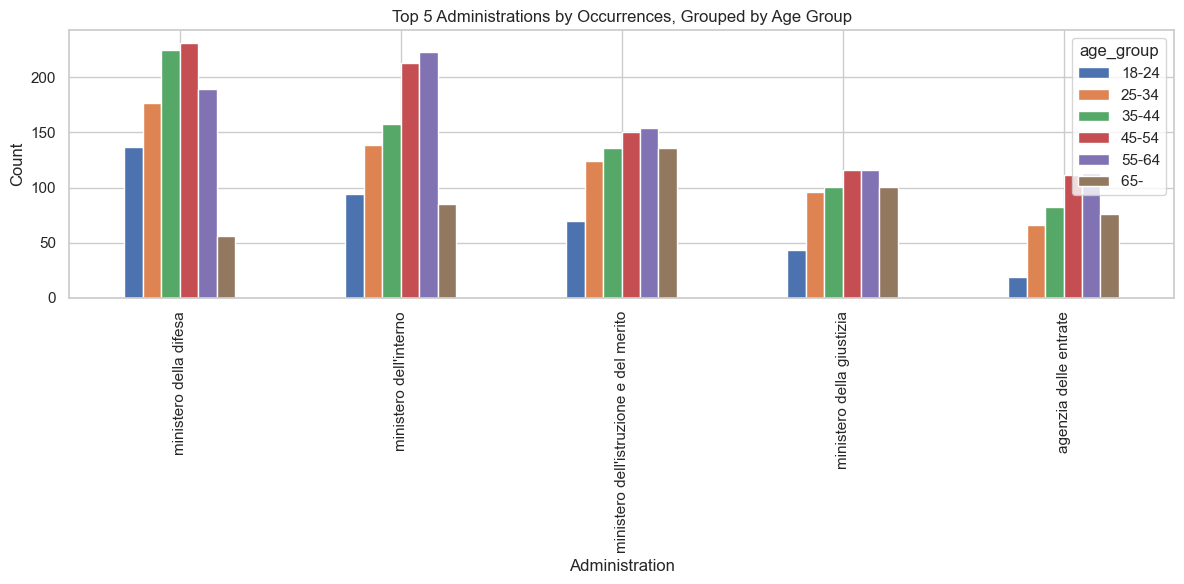

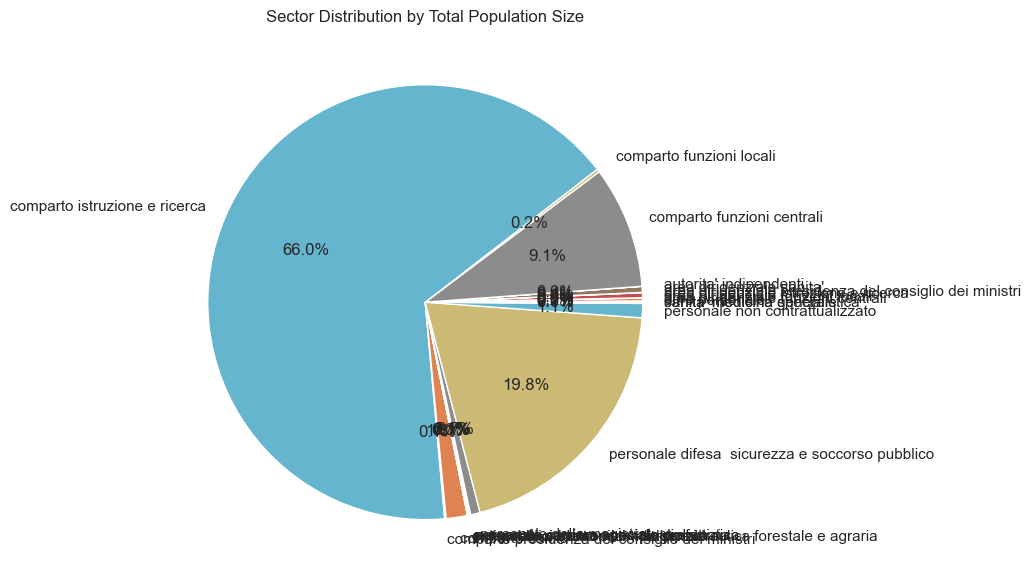

In [38]:
# 9. Bar chart of top 5 administrations by occurrences, grouped by age_group
adm_col = 'administration'
plt.figure()
access.groupby([adm_col, 'age_group']).size().unstack(fill_value=0).loc[
    access[adm_col].value_counts().nlargest(5).index
].plot(kind='bar')
plt.title('Top 5 Administrations by Occurrences, Grouped by Age Group')
plt.xlabel('Administration')
plt.ylabel('Count')
plt.tight_layout()

# 10. Pie chart of sector distribution by total population_size
plt.figure()
income.groupby('sector')['population_size'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Sector Distribution by Total Population Size')
plt.ylabel('')
plt.tight_layout()

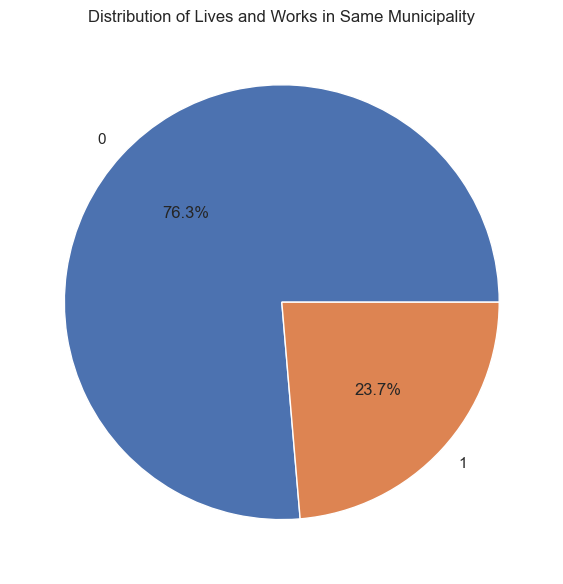

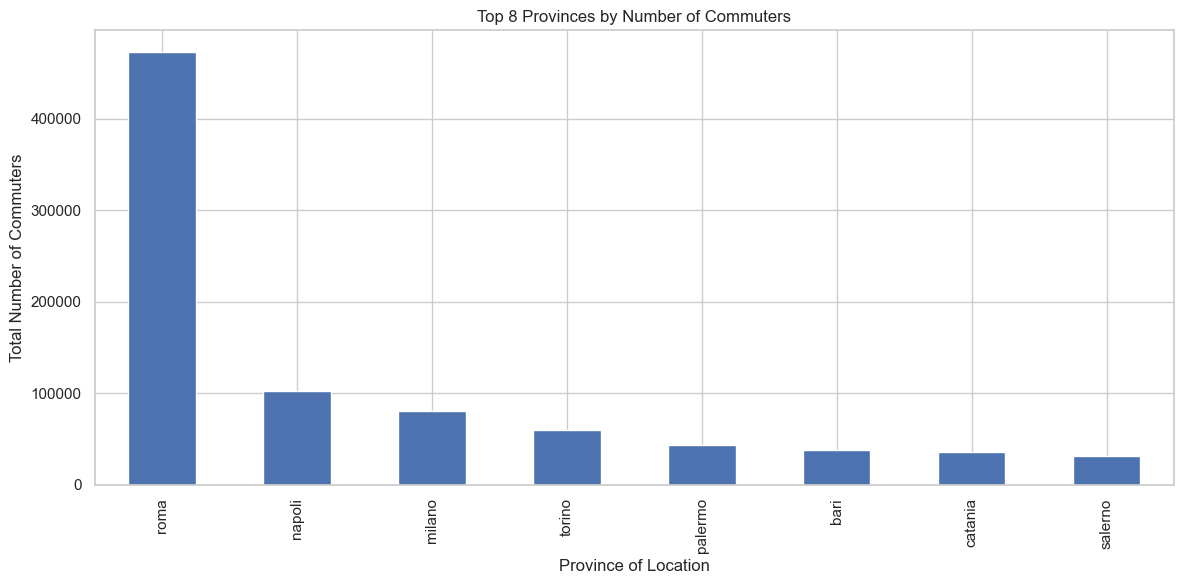

In [39]:
# 11. Pie chart of distribution of lives_and_works_same_municipality
plt.figure()
commuters['lives_and_works_same_municipality'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Lives and Works in Same Municipality')
plt.ylabel('')
plt.tight_layout()

# 12. Bar chart of top 8 provinces by sum of number_of_commuters
prov_col = 'province_of_the_location'
plt.figure()
commuters.groupby(prov_col)['number_of_commuters'].sum().nlargest(8).plot(kind='bar')
plt.title('Top 8 Provinces by Number of Commuters')
plt.xlabel('Province of Location')
plt.ylabel('Total Number of Commuters')
plt.tight_layout()

plt.show()